In [139]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import matplotlib as mlp

In [134]:
sns.__version__

'0.11.2'

In [137]:
np.__version__

1.21.6


In [138]:
pd.__version__

'1.3.5'

In [140]:
mlp.__version__

'3.2.2'

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# load dataset
loan0 = pd.read_csv("/content/drive/MyDrive/1upgradsheets/loan2.csv")

In [80]:

loan0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(71), int64(15), object(25)
memory usage: 13.4+ MB


In [81]:
loan0.shape

(15854, 111)


### **Data Cleaning**
 

In [82]:
# Deleting customer behavouor data

loan0 = loan0.drop(columns =['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
                             'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                             'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'])

In [83]:
# Deleting unwanted data
loan0 = loan0.drop(columns=['id','member_id','emp_title','url','zip_code','addr_state','title','issue_d','initial_list_status','policy_code','pymnt_plan','tax_liens'])

In [84]:
# Drop Columns where all values are NA.

loan0.dropna(how='all',axis=1, inplace=True)

In [85]:
loan0.shape

(15854, 25)

In [86]:
# Drop Columns where all values are 0.
loan0 = loan0.loc[:, (loan0 != 0).any(axis=0)]

In [87]:
# Delete data rows with Current Loan Status
loan0 = loan0[~loan0['loan_status'].isin(['Current'])]

In [88]:
# Check if any values are null

loan0.isnull().sum()

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_length                          514
home_ownership                        0
annual_inc                            0
verification_status                   0
loan_status                           0
desc                               6129
purpose                               0
dti                                   0
mths_since_last_delinq             9763
mths_since_last_record            13947
next_pymnt_d                      14720
mths_since_recent_revol_delinq    14719
pub_rec_bankruptcies                  1
dtype: int64

In [89]:
# Delete Columns with high Missing Values
loan0 = loan0.drop(columns =['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_recent_revol_delinq'])


### **Data Checking**



In [90]:
# Checking Missing Values

loan0['pub_rec_bankruptcies'].value_counts()

0.0    14070
1.0      648
2.0        1
Name: pub_rec_bankruptcies, dtype: int64

In [91]:
# Filling zero in missing places
loan0['pub_rec_bankruptcies'] = loan0['pub_rec_bankruptcies'].fillna(0)

In [92]:
loan0['emp_length'].value_counts()

10+ years    3644
2 years      1445
3 years      1401
< 1 year     1364
5 years      1293
4 years      1256
1 year       1073
6 years       988
7 years       731
8 years       557
9 years       454
Name: emp_length, dtype: int64

In [93]:
loan0.emp_length.isnull().sum()

514

In [94]:
# Delete row with missing values
loan0 = loan0[~loan0['emp_length'].isnull()]

In [95]:
# There are no null values

loan0.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

**Sanity Checks**

In [96]:
# Compare if columns have similar values
loan0['loan_amnt'].equals(loan0['funded_amnt'])

False

In [97]:
s1 = loan0['loan_amnt']
s2 = loan0['funded_amnt']

s1.compare(s2)

,self,other
61,17500.0,8950.0
66,12500.0,8925.0
70,20975.0,13575.0
77,7250.0,7200.0
80,35000.0,22075.0
...,...,...
15724,28800.0,20325.0
15725,25000.0,16550.0
15735,25000.0,18325.0
15781,25000.0,21200.0


In [98]:
loan0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14206 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             14206 non-null  int64  
 1   funded_amnt           14206 non-null  int64  
 2   funded_amnt_inv       14206 non-null  float64
 3   term                  14206 non-null  object 
 4   int_rate              14206 non-null  object 
 5   installment           14206 non-null  float64
 6   grade                 14206 non-null  object 
 7   sub_grade             14206 non-null  object 
 8   emp_length            14206 non-null  object 
 9   home_ownership        14206 non-null  object 
 10  annual_inc            14206 non-null  float64
 11  verification_status   14206 non-null  object 
 12  loan_status           14206 non-null  object 
 13  purpose               14206 non-null  object 
 14  dti                   14206 non-null  float64
 15  pub_rec_bankruptcie

Converting Data Type and correcting values



In [99]:
# remove % symbol from Interest rate column
loan0['int_rate'] = loan0.int_rate.apply(lambda x: 0 if x=="0" else float(x[:-1]))

In [100]:
# remove year wold from employee lenght column 

def emp_length_convert(loan0, column):
    loan0[column] = loan0[column].str.replace('\+ years', '')
    loan0[column] = loan0[column].str.replace('< 1 year', str(0))
    loan0[column] = loan0[column].str.replace(' years', '')
    loan0[column] = loan0[column].str.replace(' year', '')
    loan0[column] = pd.to_numeric(loan0[column])
    loan0[column].fillna(value = 0, inplace = True)

emp_length_convert(loan0,'emp_length')

In [101]:
loan0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14206 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             14206 non-null  int64  
 1   funded_amnt           14206 non-null  int64  
 2   funded_amnt_inv       14206 non-null  float64
 3   term                  14206 non-null  object 
 4   int_rate              14206 non-null  float64
 5   installment           14206 non-null  float64
 6   grade                 14206 non-null  object 
 7   sub_grade             14206 non-null  object 
 8   emp_length            14206 non-null  int64  
 9   home_ownership        14206 non-null  object 
 10  annual_inc            14206 non-null  float64
 11  verification_status   14206 non-null  object 
 12  loan_status           14206 non-null  object 
 13  purpose               14206 non-null  object 
 14  dti                   14206 non-null  float64
 15  pub_rec_bankruptcie

employee expirence converted to int


In [102]:
loan0.emp_length.describe()

count    14206.000000
mean         5.327467
std          3.528918
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

In [103]:
# Remove months world from Term Column
loan0['term'] = loan0.term.apply(lambda x: 0 if x=="0" else int(x[:-7]))



In [104]:
loan0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14206 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             14206 non-null  int64  
 1   funded_amnt           14206 non-null  int64  
 2   funded_amnt_inv       14206 non-null  float64
 3   term                  14206 non-null  int64  
 4   int_rate              14206 non-null  float64
 5   installment           14206 non-null  float64
 6   grade                 14206 non-null  object 
 7   sub_grade             14206 non-null  object 
 8   emp_length            14206 non-null  int64  
 9   home_ownership        14206 non-null  object 
 10  annual_inc            14206 non-null  float64
 11  verification_status   14206 non-null  object 
 12  loan_status           14206 non-null  object 
 13  purpose               14206 non-null  object 
 14  dti                   14206 non-null  float64
 15  pub_rec_bankruptcie

Term column is converted to int 


In [105]:
loan0.term.value_counts()

36    10085
60     4121
Name: term, dtype: int64

In [106]:
loan0.int_rate.describe()

count    14206.000000
mean        12.257268
std          4.202552
min          5.420000
25%          8.490000
50%         11.990000
75%         15.270000
max         24.400000
Name: int_rate, dtype: float64

In [107]:
loan0.emp_length.describe()

count    14206.000000
mean         5.327467
std          3.528918
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64

In [108]:
# Checking if loan amount is higher than funded amount

loan0[loan0.loan_amnt > loan0.funded_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies
61,17500,8950,8925.0,60,17.27,223.74,D,D3,6,RENT,40000.0,Verified,Fully Paid,small_business,19.47,0.0
66,12500,8925,8925.0,60,17.27,223.11,D,D3,5,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,13.16,1.0
70,20975,13575,13550.0,60,17.58,341.63,D,D4,5,MORTGAGE,44000.0,Verified,Fully Paid,credit_card,18.79,1.0
77,7250,7200,7175.0,60,21.67,197.51,F,F3,0,RENT,75000.0,Verified,Fully Paid,debt_consolidation,24.82,1.0
80,35000,22075,22050.0,60,17.27,551.84,D,D3,3,MORTGAGE,150000.0,Verified,Fully Paid,home_improvement,7.51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,28800,20325,20325.0,60,19.69,534.99,E,E5,10,MORTGAGE,92000.0,Source Verified,Charged Off,debt_consolidation,20.61,1.0
15725,25000,16550,16525.0,60,19.29,431.97,E,E4,10,RENT,105000.0,Verified,Fully Paid,home_improvement,1.17,0.0
15735,25000,18325,18325.0,60,18.79,473.25,E,E3,3,MORTGAGE,85000.0,Verified,Fully Paid,small_business,12.56,0.0
15781,25000,21200,21125.0,60,11.99,471.48,B,B5,1,OWN,144240.0,Verified,Charged Off,other,15.77,0.0


In [109]:
# Checking if wrong data in funded investment amount , is it higher than funded amount. no data found
loan0[loan0.funded_amnt_inv > loan0.funded_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies


**Data Analysis**

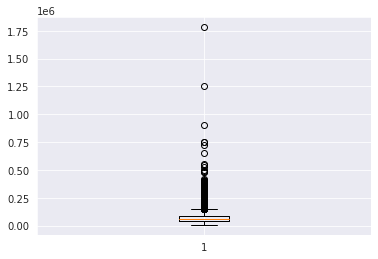

In [110]:
plt.boxplot(loan0['annual_inc'])
plt.show()


We can see that there are outliers


In [111]:
loan02 = loan0[loan0.annual_inc < 200000]

We will consider dataset with employee annual income below 200000

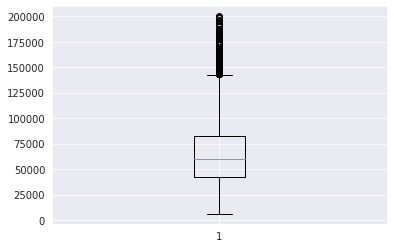

In [112]:
plt.boxplot(loan02['annual_inc'])
plt.show()

In [113]:
import warnings
warnings.filterwarnings("ignore")

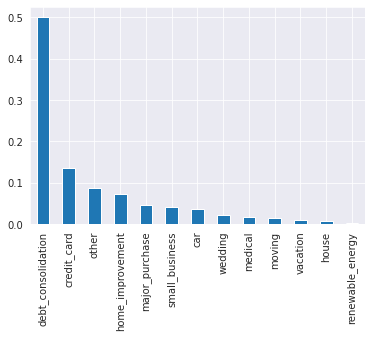

In [114]:
(loan02['purpose'].value_counts()/len(loan02)).plot.bar()

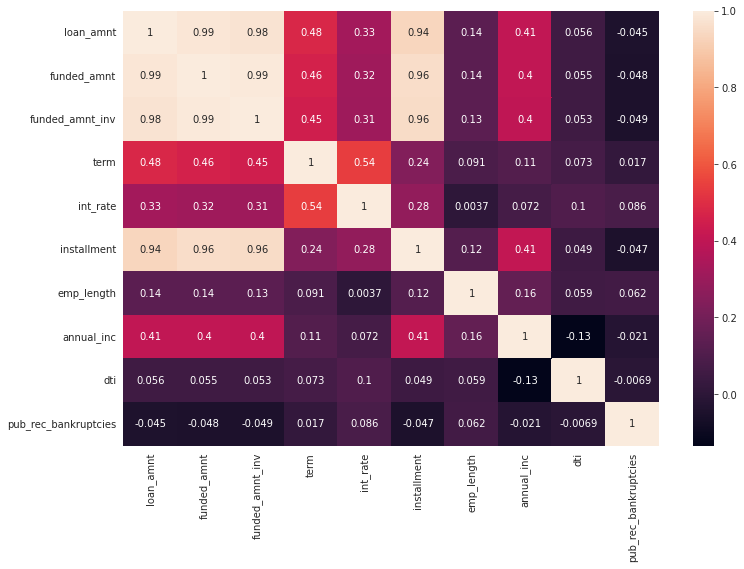

In [115]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan02.corr(),annot=True)
plt.show()

we can see from above heat map that, relation between loan amount and installment 

In [116]:
loan02['loan_status_bin'] = loan02['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

Adding loan status bin column where charged off = 1 and Fully Paid = 0

Text(0.5, 1.0, 'Total committed')

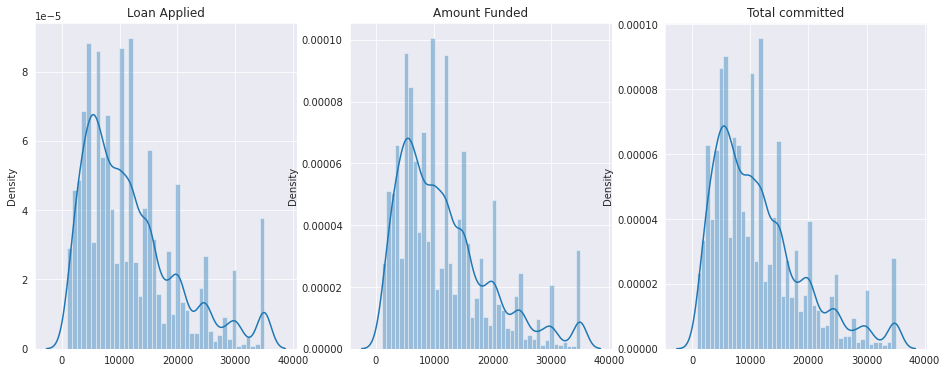

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))
loan_amt = loan02["loan_amnt"].values
funded_amt = loan02["funded_amnt"].values
investor_amt = loan02["funded_amnt_inv"].values
sns.distplot(loan_amt, ax=ax[0])
ax[0].set_title("Loan Applied",)
sns.distplot(funded_amt, ax=ax[1])
ax[1].set_title("Amount Funded")
sns.distplot(investor_amt, ax=ax[2])
ax[2].set_title("Total committed")

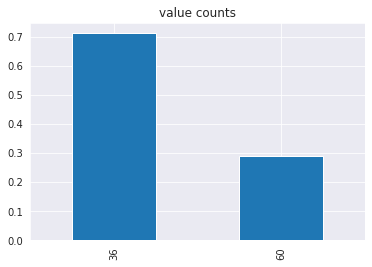

In [118]:
#the distribution of loan term is higher in 36 months

(loan02['term'].value_counts()/len(loan02)).plot.bar(title='value counts')

In [119]:
loan02.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2314.0,14.651292,4.083807,5.42,11.71,14.65,17.58,24.40
Fully Paid,11618.0,11.740422,4.035540,5.42,7.90,11.49,14.27,24.11


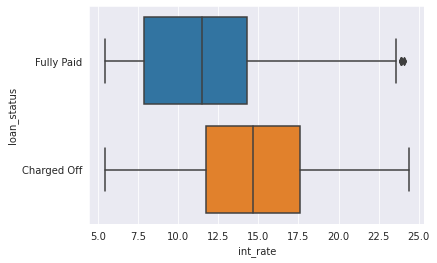

In [120]:
sns.boxplot(data=loan02, x='int_rate',  y='loan_status');


In Above Graph we can see relation between Charged off loan is more on high Interest Rate


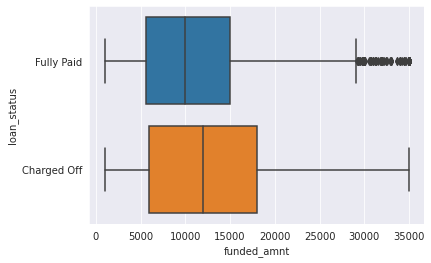

In [121]:
sns.boxplot(data=loan02, x='funded_amnt', y='loan_status');


In above graph we can see that Charged off loan in on higher funded amount

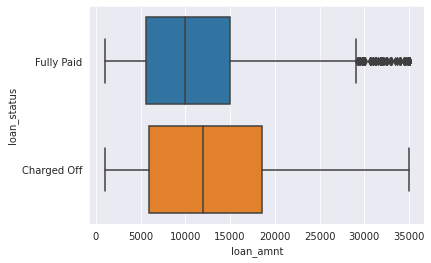

In [122]:
sns.boxplot(data=loan02, x='loan_amnt', y='loan_status' );


In above graph we can see that Charged off loan in on higher loan amount

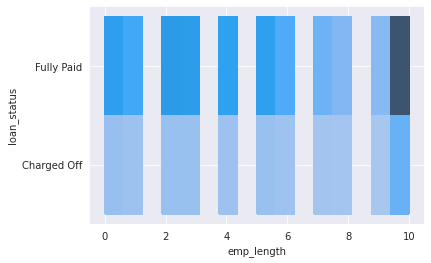

In [123]:
sns.histplot(data=loan02, x='emp_length', y='loan_status' );


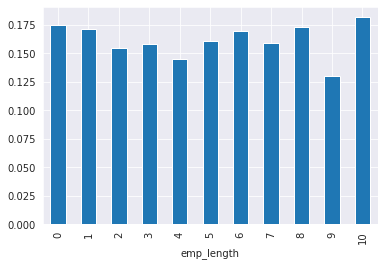

In [124]:
loan02.groupby('emp_length')['loan_status_bin'].mean().plot.bar()

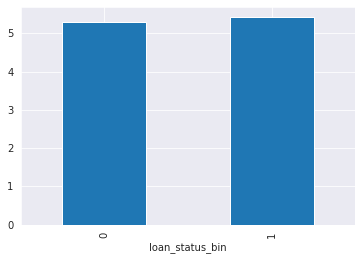

In [125]:
loan02.groupby('loan_status_bin')['emp_length'].mean().plot.bar()

From above Three graphs we can see that, there is not much relation between   employee experience and loan status

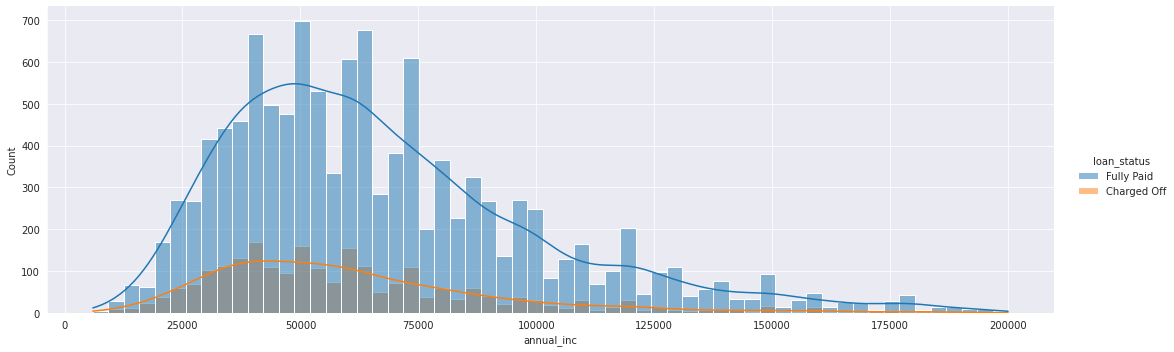

In [126]:
sns.set_style("darkgrid")
sns.displot(data=loan02, x='annual_inc', hue='loan_status',aspect=3, kde=True);

Above graph shows distribution of annual income of employee whos loan was charged off


In [127]:
loan02.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2314.0,60812.888077,30508.714064,9600.0,39996.0,55000.0,75000.0,195800.0
Fully Paid,11618.0,67314.676527,33431.615049,6000.0,43000.0,60000.0,84000.0,199992.0


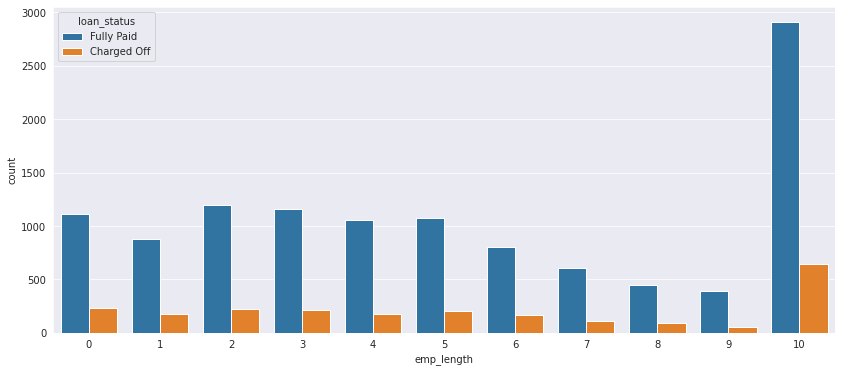

In [128]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=loan02,  hue='loan_status')

we can see that higher experience is related to higher charged off, ratio is consistence across graph, experience does not play much role


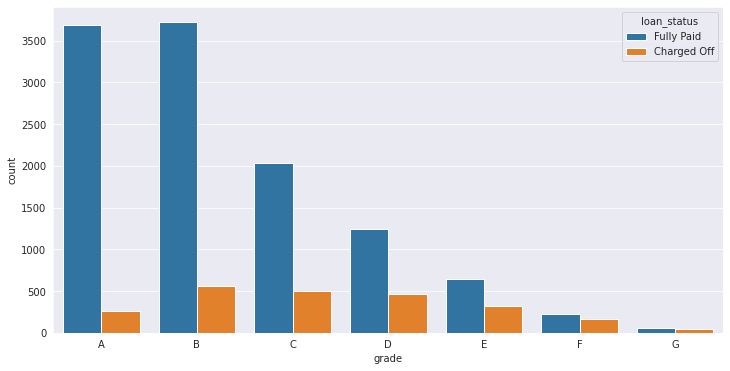

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(x='grade',data=loan02,hue='loan_status', order=sorted(loan02['grade'].unique()) );

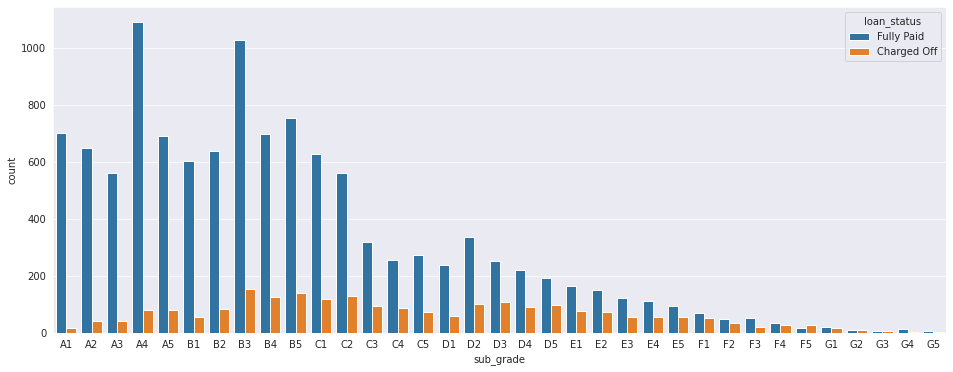

In [130]:
plt.figure(figsize=(16,6))
sns.countplot(x='sub_grade',data=loan02,order = sorted(loan02['sub_grade'].unique()),hue='loan_status')

We can see in loan grade and sub loan grade graph that, charged off loan are related 


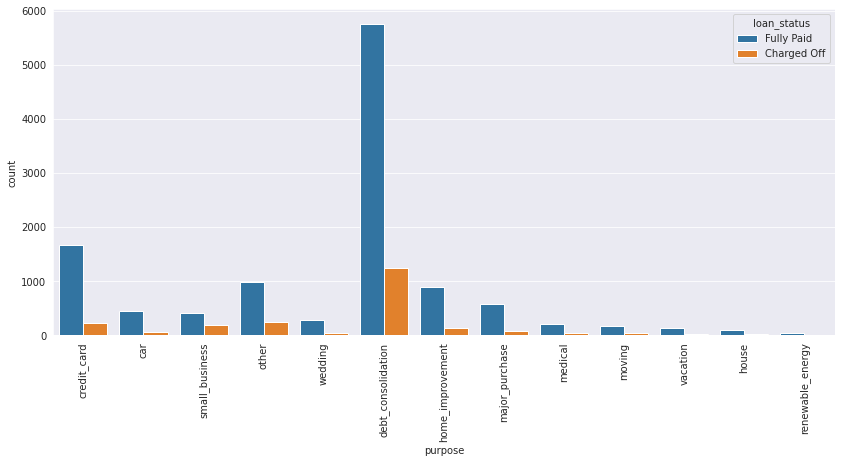

In [131]:
plt.figure(figsize=(14,6))
sns.countplot(data=loan02,x='purpose', hue='loan_status' );
plt.xticks(rotation=90);

From Above Graph we can see that most of the charged off loan are from dept consolidation purpose

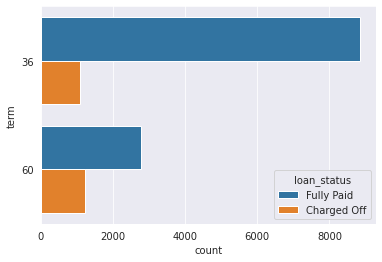

In [132]:
sns.countplot(data=loan02,y='term', hue='loan_status' );

Lower the loan duration has lower chances of charged off.